# HW2 - EM Algorithm for Probit Regression
###### *Bayesian Models for Machine Learning*  
Manuel Rueda (mr3523)

In [1]:
## Libraries and setup.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from tqdm import tqdm
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [2]:
## Load data.
data = sio.loadmat('data/mnist_mat.mat')
ytrain = data['ytrain']
Xtrain = data['Xtrain']
ytest = data['ytest']
Xtest = data['Xtest']

### a) Implement the EM algorithm.

In [3]:
## Set parameters.
sigma = 1.5
lmbda = 1

d = Xtrain.shape[0]
n = Xtrain.shape[1]
T = 100

X = Xtrain.T
w = np.zeros([d,n])

In [4]:
## Estimate w[:,t] by maximizing the joint log-likelihood w[:,t]ith the EM algorithm.
jllike = np.zeros(T)

for t in tqdm(range(T)):
    ## Step 1: Calculate Eq[].
    E_data = X.dot(w[:,t-1]) + sigma * \
                (norm.pdf(-X.dot(w[:,t-1]) / sigma) / (ytrain - norm.cdf(-X.dot(w[:,t-1]) / sigma)))

    ## Step 2: Update w[:,t].
    sum_1 = np.zeros([d,d])
    sum_2 = np.zeros_like(w[:,t])

    for i in range(n):
        sum_1 += np.outer(X[i, :], X[i, :])
        sum_2 += np.multiply(X[i, :], E_data[:, i])

    elem_1 = np.linalg.inv(lmbda * np.identity(d) + (1/sigma**2) * sum_1)
    elem_2 = (1/sigma**2) * sum_2

    w[:,t] = elem_1.dot(elem_2)

    ## Step 3: Calculate the joint likelihood.
    jllike[t] = d/2 * np.log(lmbda / (2 * np.pi)) \
        - (lmbda / 2) * w[:,t].T.dot(w[:,t]) \
        + np.sum(np.multiply(ytrain, np.log(norm.cdf(X.dot(w[:,t]) / sigma)))) \
        + np.sum(np.multiply(1 - ytrain, np.log(1 - norm.cdf(X.dot(w[:,t]) / sigma))))

100%|██████████| 100/100 [00:17<00:00,  5.87it/s]


### b) Plot joint likelihood as function of *t*.

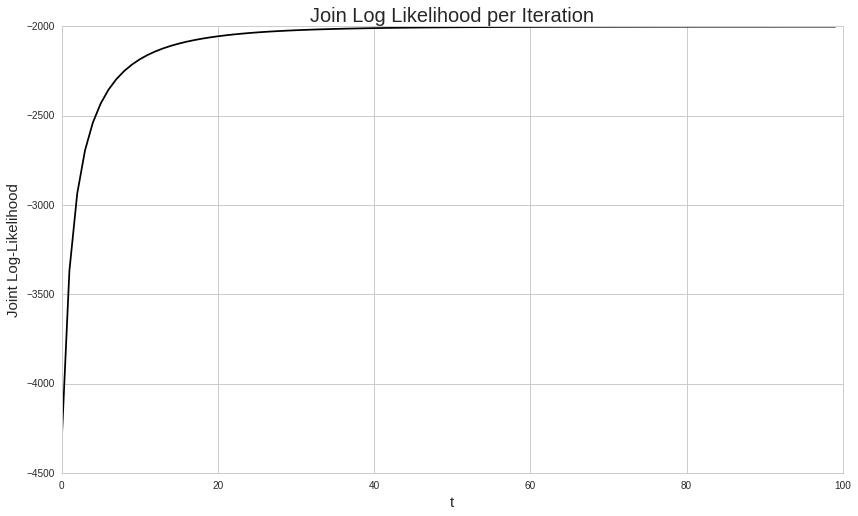

In [5]:
plt.plot(jllike, color='black')
plt.ylabel('Joint Log-Likelihood', size=15);
plt.xlabel('t', size=15);
plt.title('Join Log Likelihood per Iteration', size = 20);

### c) Making predictions and the confusion matrix.

In [6]:
X2 = Xtest.T

## First we evaluate on training set...
yprobs = norm.cdf((1/sigma) * X.dot(w[:,t]))
ypred = yprobs > 0.5
print 'Test Accuracy: %.2f%%' %(np.sum(ypred == ytrain)/float(ytrain.shape[1])*100)

## And then in test.
yprobs = norm.cdf((1/sigma) * X2.dot(w[:,t]))
ypred = yprobs > 0.5
print 'Test Accuracy: %.2f%%' %(np.sum(ypred == ytest)/float(ytest.shape[1])*100)

Test Accuracy: 93.84%
Test Accuracy: 93.52%


In [7]:
print 'Confusion Matrix'
pd.DataFrame(confusion_matrix(ytest[0], ypred))

Confusion Matrix


,0,1
0,930,52
1,77,932


### d) Misclassified digits.

In [8]:
errors = np.where(ytest[0] != ypred)[0]

img_d1 = X2[errors[0], :]
img_d2 = X2[errors[1], :]
img_d3 = X2[errors[2], :]

img1 = np.dot(img_d1, data['Q'].T).reshape(28,28)
img2 = np.dot(img_d2, data['Q'].T).reshape(28,28)
img3 = np.dot(img_d3, data['Q'].T).reshape(28,28)

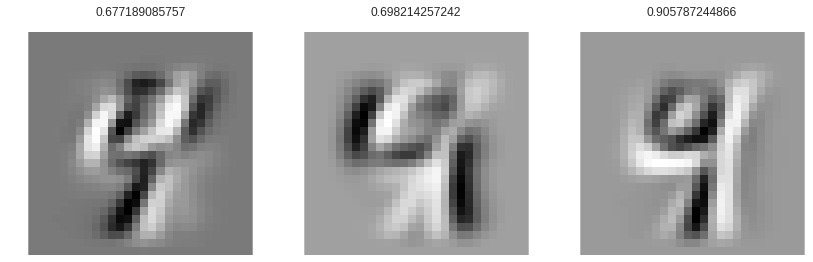

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,4))
ax1.matshow(img1)
ax1.set_title(yprobs[errors[0]])
ax1.axis('off')
ax2.matshow(img2)
ax2.set_title(yprobs[errors[1]])
ax2.axis('off')
ax3.matshow(img3)
ax3.set_title(yprobs[errors[2]])
ax3.axis('off');

### e) Ambiguous predictions.

In [10]:
## Images with prediction closest to 0.5.
closest = sorted(range(len(yprobs)), key = lambda k: abs(yprobs[k] - 0.5))

img_m_d1 = X2[closest[0], :]
img_m_d2 = X2[closest[1], :]
img_m_d3 = X2[closest[2], :]

img_m1 = np.dot(img_m_d1, data['Q'].T).reshape(28,28)
img_m2 = np.dot(img_m_d2, data['Q'].T).reshape(28,28)
img_m3 = np.dot(img_m_d3, data['Q'].T).reshape(28,28)

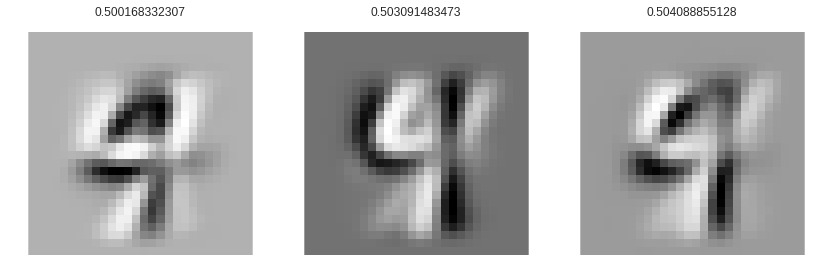

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,4))
ax1.matshow(img_m1)
ax1.set_title(yprobs[closest[0]])
ax1.axis('off')
ax2.matshow(img_m2)
ax2.set_title(yprobs[closest[1]])
ax2.axis('off')
ax3.matshow(img_m3)
ax3.set_title(yprobs[closest[2]])
ax3.axis('off');

### f) Reconstructing the vector $w$

In [12]:
img_w_d1 = w[:,0]
img_w_d2 = w[:,4]
img_w_d3 = w[:,9]
img_w_d4 = w[:,24]
img_w_d5 = w[:,49]
img_w_d6 = w[:,99]

img_w1 = np.dot(img_w_d1, data['Q'].T).reshape(28,28)
img_w2 = np.dot(img_w_d2, data['Q'].T).reshape(28,28)
img_w3 = np.dot(img_w_d3, data['Q'].T).reshape(28,28)
img_w4 = np.dot(img_w_d4, data['Q'].T).reshape(28,28)
img_w5 = np.dot(img_w_d5, data['Q'].T).reshape(28,28)
img_w6 = np.dot(img_w_d6, data['Q'].T).reshape(28,28)

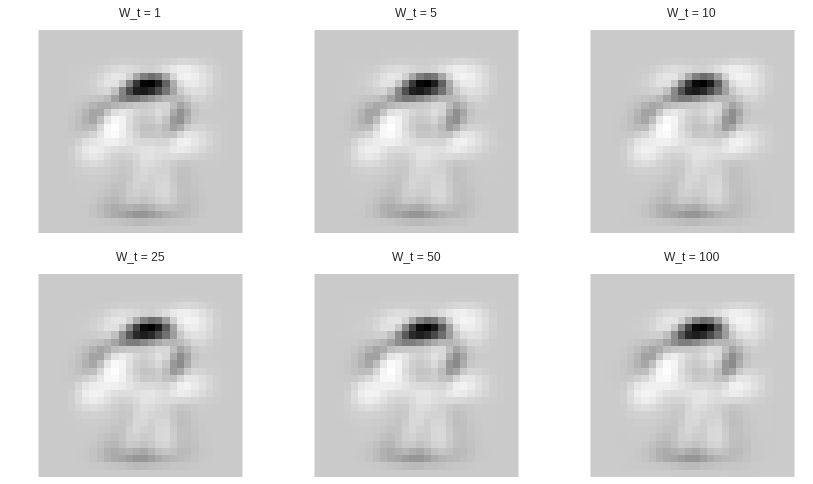

In [13]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True, figsize=(14,8))
ax1.matshow(img_w1)
ax1.set_title('W_t = 1')
ax1.axis('off')
ax2.matshow(img_w2)
ax2.set_title('W_t = 5')
ax2.axis('off')
ax3.matshow(img_w3)
ax3.set_title('W_t = 10')
ax3.axis('off')

ax4.matshow(img_w4)
ax4.set_title('W_t = 25')
ax4.axis('off')
ax5.matshow(img_w5)
ax5.set_title('W_t = 50')
ax5.axis('off')
ax6.matshow(img_w6)
ax6.set_title('W_t = 100')
ax6.axis('off');